In [29]:
#Importing packages
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
import json
from MCForecastTools import MCSimulation

%matplotlib inline

In [30]:
#Requesting Crypto Library
crypto_url = "https://api.alternative.me/v2/ticker/"
requests.get(crypto_url)

<Response [200]>

In [31]:
#Setting weights of Bitcoin and Ethereum
my_btc = 1.2
my_eth = 5.3

In [62]:
#Setting library as a varialbe and formating to JSON
crypto_data = requests.get(crypto_url)
crypto_tickers = crypto_data.json()

#Retrieving current price of Bitcoin and ETH
btc_price = crypto_tickers["data"]["1"]["quotes"]["USD"]["price"]
eth_price = crypto_tickers["data"]["1027"]["quotes"]["USD"]["price"]

#Calculatting portfolio value
crypto = (my_btc*btc_price)+(my_eth*eth_price)
print(f"Total value of crypto portfolio : ${crypto}")

Total value of crypto portfolio : $82457.58899999999


In [33]:
#Setting weights of stocks and bonds 
my_agg = 200
my_spy = 50

In [34]:
#Load in the ENV file
load_dotenv("apikeys.env")

True

In [35]:
#Defining the alpaca keys
alpaca_api_key = os.getenv("alpaca_api_key")
alpaca_secret_key = os.getenv("alpaca_secret_key")

# Creating the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2"
)

In [36]:
#Setting time in ISO format
today = pd.Timestamp("2021-03-31", tz="America/New_York").isoformat()

In [37]:
#Setting tickers for SPY and AGG
tickers = ["AGG", "SPY"]

#Setting timeframe
timeframe = "1D"

In [38]:
market_portfolio = alpaca.get_barset(
    tickers,
    timeframe,
    start = today,
    end = today
).df

market_portfolio.head()

AGG                                      SPY  \
                             open    high     low   close   volume    open   
time                                                                         
2021-03-31 00:00:00-04:00  113.84  113.98  113.71  113.82  5851348  395.34   

                                                          
                          high     low   close    volume  
time                                                      
2021-03-31 00:00:00-04:00  398  395.31  396.26  88555440

In [39]:
#Storing AGG and SPY closing prices
agg_closing_price = float(market_portfolio['AGG']['close'])
spy_closing_price = float(market_portfolio['SPY']['close'])

#Calculating the total value of shares for AGG, SPY, and total shares
agg_total_value = agg_closing_price*my_agg
spy_total_value = spy_closing_price*my_spy
shares = agg_total_value+spy_total_value
print(f"Total AGG holdings value: ${agg_total_value}")
print(f"Total SPY holdings value: ${spy_total_value}")
print(f"Total share value: ${shares}")

Total AGG holdings value: $22764.0
Total SPY holdings value: $19813.0
Total share value: $42577.0


In [63]:
#Defining Montly Income and Creating portfolio dataframe
monthly_income = 12000
portfolios = {"": ['crypto','shares'], "amount": [82457.58 ,42577.0]}
df_savings = pd.DataFrame(portfolios, columns = ['', 'amount'])
df_savings = df_savings.set_index("")
df_savings.head()                                     

,amount
,
crypto,82457.58
shares,42577.00


<AxesSubplot:ylabel='amount'>

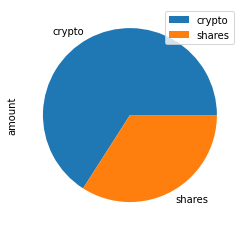

In [64]:
#Creating Pie Chart of shares and cryptos
df_savings.plot.pie(y="amount")

In [65]:
#Creating if else statement to determine if the emergency fund is greater than the savings
current_savings = shares + crypto
emergency_fund = 3*monthly_income
if current_savings > emergency_fund:
    print("Congratulations! You have enough money in this fund")
elif current_savings == emergency_fund:
    print("Congratulations on reaching this financial goal!")
else:
    print(f"You are {emergency_fund-current_savings} away from reaching you goal!")

Congratulations! You have enough money in this fund


In [43]:
#Creating a data file of the historical data for both AGG and SPY for dates of 2021-03-31 to 2016-03-31
start_date = pd.Timestamp("2016-03-31", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2021-03-31", tz="America/New_York").isoformat()

tickers = ["SPY","AGG"]

timeframe = "1D"

traditional_portfolio_1 = alpaca.get_barset(
    tickers,
    timeframe,
    start=start_date,
    end=end_date,
    limit=1000
).df

traditional_portfolio_1

AGG                                         \
                             open     high       low    close     volume   
time                                                                       
2017-04-10 00:00:00-04:00  108.53  108.650  108.4901  108.570  1751500.0   
2017-04-11 00:00:00-04:00  108.76  108.980  108.7500  108.900  2054745.0   
2017-04-12 00:00:00-04:00  108.93  109.200  108.8900  109.140  2243678.0   
2017-04-13 00:00:00-04:00  109.25  109.390  109.1300  109.280  2004878.0   
2017-04-17 00:00:00-04:00  109.30  109.400  109.1800  109.220  1432374.0   
...                           ...      ...       ...      ...        ...   
2021-03-25 00:00:00-04:00  114.24  114.290  113.9900  114.095  5040681.0   
2021-03-26 00:00:00-04:00  113.91  114.075  113.8600  113.930  3287634.0   
2021-03-29 00:00:00-04:00  113.52  114.000  113.5200  113.720  5526443.0   
2021-03-30 00:00:00-04:00  113.64  113.850  113.5250  113.815  4692114.0   
2021-03-31 00:00:00-04:00  113.84  113.980  113.7100  113.820  5846835.0   

                              SPY                                      
                             open    high     low   close      volume  
time                                                                   
2017-04-10 00:00:00-04:00     NaN     NaN     NaN     NaN         NaN  
2017-04-11 00:00:00-04:00  234.87  235.18  233.34  235.04  63951745.0  
2017-04-12 00:00:00-04:00  234.74  234.96  233.77  234.10  55338215.0  
2017-04-13 00:00:00-04:00  233.63  234.49  232.54  232.54  63216959.0  
2017-04-17 00:00:00-04:00  233.11  234.57  232.88  234.57  46820072.0  
...                           ...     ...     ...     ...         ...  
2021-03-25 00:00:00-04:00  385.98  390.55  383.90  389.63  99714368.0  
2021-03-26 00:00:00-04:00  390.93  396.41  390.29  395.99  90959116.0  
2021-03-29 00:00:00-04:00  394.40  396.75  392.81  395.77  85589461.0  
2021-03-30 00:00:00-04:00  394.42  395.45  393.02  394.40  62537671.0  
2021-03-31 00:00:00-04:00  395.34  398.00  395.31  396.28  88541243.0  

[1001 rows x 10 columns]

In [46]:
#Creating a data file of the historical data for both AGG and SPY for dates of 2017-04-09 to 2016-03-31
start_date = pd.Timestamp("2016-03-31", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2017-04-09", tz="America/New_York").isoformat()

#tickers = ["SPY","AGG"]

#timeframe = "1D"

traditional_portfolio_2 = alpaca.get_barset(
    tickers,
    timeframe,
    start=start_date,
    end=end_date,
    limit=1000
).df

traditional_portfolio_2

AGG                                       \
                             open      high       low   close   volume   
time                                                                     
2016-03-31 00:00:00-04:00  110.52  110.8500  110.5200  110.82  5120808   
2016-04-01 00:00:00-04:00  110.53  110.6599  110.3500  110.54  5013983   
2016-04-04 00:00:00-04:00  110.60  110.6700  110.5100  110.59  3018930   
2016-04-05 00:00:00-04:00  110.95  110.9750  110.7100  110.79  2617545   
2016-04-06 00:00:00-04:00  110.80  110.8000  110.6235  110.75  1858620   
...                           ...       ...       ...     ...      ...   
2017-04-03 00:00:00-04:00  108.31  108.6800  108.3000  108.67  3857775   
2017-04-04 00:00:00-04:00  108.61  108.6500  108.5200  108.56  1482935   
2017-04-05 00:00:00-04:00  108.48  108.7400  108.4530  108.69  1900282   
2017-04-06 00:00:00-04:00  108.64  108.7100  108.4800  108.67  1599535   
2017-04-07 00:00:00-04:00  108.80  108.8900  108.4200  108.44  1668826   

                              SPY                                     
                             open    high      low   close    volume  
time                                                                  
2016-03-31 00:00:00-04:00  205.91  206.41  205.330  205.55  66645503  
2016-04-01 00:00:00-04:00  204.34  207.14  203.980  206.89  82800637  
2016-04-04 00:00:00-04:00  206.83  207.07  205.890  206.27  47328510  
2016-04-05 00:00:00-04:00  204.67  205.26  203.890  204.19  67894686  
2016-04-06 00:00:00-04:00  204.29  206.49  203.980  206.43  75909355  
...                           ...     ...      ...     ...       ...  
2017-04-03 00:00:00-04:00  235.80  236.03  233.910  235.37  58627715  
2017-04-04 00:00:00-04:00  235.00  235.58  234.555  235.51  43130784  
2017-04-05 00:00:00-04:00  236.26  237.39  234.540  234.77  84819899  
2017-04-06 00:00:00-04:00  234.95  236.04  234.425  235.39  53559902  
2017-04-07 00:00:00-04:00  235.15  236.00  234.640  235.17  53293901  

[259 rows x 10 columns]

In [47]:
#Creating a single datafile for the traditional portfolio
traditional_portfolio = traditional_portfolio_2.append(traditional_portfolio_1)
traditional_portfolio

AGG                                          \
                             open      high       low    close     volume   
time                                                                        
2016-03-31 00:00:00-04:00  110.52  110.8500  110.5200  110.820  5120808.0   
2016-04-01 00:00:00-04:00  110.53  110.6599  110.3500  110.540  5013983.0   
2016-04-04 00:00:00-04:00  110.60  110.6700  110.5100  110.590  3018930.0   
2016-04-05 00:00:00-04:00  110.95  110.9750  110.7100  110.790  2617545.0   
2016-04-06 00:00:00-04:00  110.80  110.8000  110.6235  110.750  1858620.0   
...                           ...       ...       ...      ...        ...   
2021-03-25 00:00:00-04:00  114.24  114.2900  113.9900  114.095  5040681.0   
2021-03-26 00:00:00-04:00  113.91  114.0750  113.8600  113.930  3287634.0   
2021-03-29 00:00:00-04:00  113.52  114.0000  113.5200  113.720  5526443.0   
2021-03-30 00:00:00-04:00  113.64  113.8500  113.5250  113.815  4692114.0   
2021-03-31 00:00:00-04:00  113.84  113.9800  113.7100  113.820  5846835.0   

                              SPY                                      
                             open    high     low   close      volume  
time                                                                   
2016-03-31 00:00:00-04:00  205.91  206.41  205.33  205.55  66645503.0  
2016-04-01 00:00:00-04:00  204.34  207.14  203.98  206.89  82800637.0  
2016-04-04 00:00:00-04:00  206.83  207.07  205.89  206.27  47328510.0  
2016-04-05 00:00:00-04:00  204.67  205.26  203.89  204.19  67894686.0  
2016-04-06 00:00:00-04:00  204.29  206.49  203.98  206.43  75909355.0  
...                           ...     ...     ...     ...         ...  
2021-03-25 00:00:00-04:00  385.98  390.55  383.90  389.63  99714368.0  
2021-03-26 00:00:00-04:00  390.93  396.41  390.29  395.99  90959116.0  
2021-03-29 00:00:00-04:00  394.40  396.75  392.81  395.77  85589461.0  
2021-03-30 00:00:00-04:00  394.42  395.45  393.02  394.40  62537671.0  
2021-03-31 00:00:00-04:00  395.34  398.00  395.31  396.28  88541243.0  

[1260 rows x 10 columns]

In [50]:
#Creating a Monte Carlo simulation with a weighted portfolio of 60-40 stocks to bonds
weighted_portfolio = MCSimulation(
    portfolio_data = traditional_portfolio,
    weights = [.4,.6],
    num_simulation = 500,
    num_trading_days = 252*30
)

weighted_portfolio.portfolio_data

AGG                                          \
                             open      high       low    close     volume   
time                                                                        
2016-03-31 00:00:00-04:00  110.52  110.8500  110.5200  110.820  5120808.0   
2016-04-01 00:00:00-04:00  110.53  110.6599  110.3500  110.540  5013983.0   
2016-04-04 00:00:00-04:00  110.60  110.6700  110.5100  110.590  3018930.0   
2016-04-05 00:00:00-04:00  110.95  110.9750  110.7100  110.790  2617545.0   
2016-04-06 00:00:00-04:00  110.80  110.8000  110.6235  110.750  1858620.0   
...                           ...       ...       ...      ...        ...   
2021-03-25 00:00:00-04:00  114.24  114.2900  113.9900  114.095  5040681.0   
2021-03-26 00:00:00-04:00  113.91  114.0750  113.8600  113.930  3287634.0   
2021-03-29 00:00:00-04:00  113.52  114.0000  113.5200  113.720  5526443.0   
2021-03-30 00:00:00-04:00  113.64  113.8500  113.5250  113.815  4692114.0   
2021-03-31 00:00:00-04:00  113.84  113.9800  113.7100  113.820  5846835.0   

                                           SPY                          \
                          daily_return    open    high     low   close   
time                                                                     
2016-03-31 00:00:00-04:00          NaN  205.91  206.41  205.33  205.55   
2016-04-01 00:00:00-04:00    -0.002527  204.34  207.14  203.98  206.89   
2016-04-04 00:00:00-04:00     0.000452  206.83  207.07  205.89  206.27   
2016-04-05 00:00:00-04:00     0.001808  204.67  205.26  203.89  204.19   
2016-04-06 00:00:00-04:00    -0.000361  204.29  206.49  203.98  206.43   
...                                ...     ...     ...     ...     ...   
2021-03-25 00:00:00-04:00    -0.000657  385.98  390.55  383.90  389.63   
2021-03-26 00:00:00-04:00    -0.001446  390.93  396.41  390.29  395.99   
2021-03-29 00:00:00-04:00    -0.001843  394.40  396.75  392.81  395.77   
2021-03-30 00:00:00-04:00     0.000835  394.42  395.45  393.02  394.40   
2021-03-31 00:00:00-04:00     0.000044  395.34  398.00  395.31  396.28   

                                                    
                               volume daily_return  
time                                                
2016-03-31 00:00:00-04:00  66645503.0          NaN  
2016-04-01 00:00:00-04:00  82800637.0     0.006519  
2016-04-04 00:00:00-04:00  47328510.0    -0.002997  
2016-04-05 00:00:00-04:00  67894686.0    -0.010084  
2016-04-06 00:00:00-04:00  75909355.0     0.010970  
...                               ...          ...  
2021-03-25 00:00:00-04:00  99714368.0     0.005419  
2021-03-26 00:00:00-04:00  90959116.0     0.016323  
2021-03-29 00:00:00-04:00  85589461.0    -0.000556  
2021-03-30 00:00:00-04:00  62537671.0    -0.003462  
2021-03-31 00:00:00-04:00  88541243.0     0.004767  

[1260 rows x 12 columns]

In [51]:
#Running the MC simulation
weighted_portfolio.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.009857,0.995570,0.995769,1.008359,0.987077,0.997650,0.991636,0.999721,1.002435,1.004994,...,1.012515,0.993651,1.004548,1.012160,0.998582,0.993687,1.005989,1.004852,1.009328,1.008959
2,1.015418,0.991299,1.008437,1.009793,0.985924,1.016602,0.988065,1.010581,1.008732,0.997315,...,1.007441,0.987562,1.019907,1.011747,0.993745,0.985169,1.001085,0.998535,1.002986,1.009210
3,1.005421,0.996974,1.005165,1.007467,0.987849,1.015835,0.979426,1.018355,1.004725,0.993990,...,1.015395,0.982615,1.030126,1.017531,0.993869,0.989262,0.992046,0.993294,1.021651,0.999741
4,1.004450,0.996230,1.008431,1.014950,0.988076,1.022116,0.979195,1.037602,1.008644,0.996688,...,1.016375,0.992073,1.035434,1.012428,0.995378,0.976649,1.008212,0.984143,1.017794,0.998585
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,28.977194,10.776825,9.251984,3.641546,8.522873,2.074757,3.993605,12.423003,11.076091,4.756463,...,5.091660,9.830183,5.483711,36.266204,4.926641,12.937710,5.101967,18.782519,11.086337,5.056895
7557,28.674037,10.864925,9.325930,3.639632,8.493784,2.095345,3.986348,12.452974,11.018101,4.757944,...,5.133272,9.793815,5.519624,36.734003,4.889256,13.002025,5.077499,18.776195,11.155280,5.013725
7558,28.759879,10.829031,9.296216,3.672396,8.521992,2.104256,4.014968,12.514331,10.990984,4.765315,...,5.087301,9.836610,5.478532,36.712567,4.934814,12.972535,5.064201,18.913671,11.249482,5.041254
7559,29.269189,10.864297,9.283575,3.660226,8.541129,2.117904,4.016770,12.551583,10.938032,4.705549,...,5.096578,9.796546,5.496443,37.054528,4.977518,13.026043,5.021021,18.861668,11.178526,5.060432


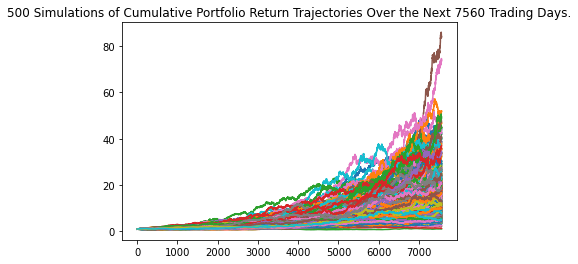

In [52]:
#Creating line plot of the MC simulation
line_plot = weighted_portfolio.plot_simulation()

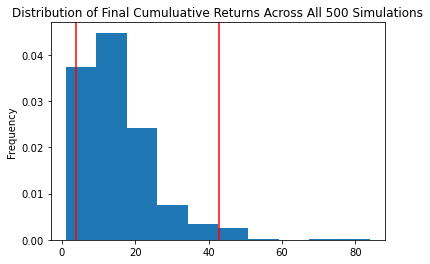

In [53]:
#Creating a distrubuted bar plot of MC simulation
dist_plot = weighted_portfolio.plot_distribution()

In [54]:
#Printing out table summarization of MC simulation
weighted_tbl = weighted_portfolio.summarize_cumulative_return()
print(weighted_tbl)

count           500.000000
mean             15.381037
std              10.201038
min               1.059013
25%               8.122562
50%              12.681766
75%              19.553641
max              84.059428
95% CI Lower      3.798673
95% CI Upper     42.714389
Name: 7560, dtype: float64


In [60]:
#Calculating the expected return at a 95% lower and upper concidence interval
intial_investment = 20000
weighted_ci_lower = round(weighted_tbl[8]*intial_investment,2)
weighted_ci_upper = round(weighted_tbl[9]*intial_investment,2)
print(f"There is a 95% chance that an initial investment of ${intial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${weighted_ci_lower} and ${weighted_ci_upper}.")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $75973.47 and $854287.79.


In [61]:
#Calculating the expected return at a 95% lower and upper concidence interval with an increase in initial investment
increased_investment = intial_investment*1.5
increased_ci_lower = round(weighted_tbl[8]*increased_investment,2)
increased_ci_upper = round(weighted_tbl[9]*increased_investment,2)
print(f"There is a 95% chance that an initial investment of ${increased_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${increased_ci_lower} and ${increased_ci_upper}.")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $113960.2 and $1281431.68.
